In [11]:
import pandas as pd
import numpy as np

In [49]:
df= pd.read_csv('data/finaldata.csv', sep=',')
# df= df.iloc[:,1:]
df= df[df['inc/dec']!=1].reset_index(drop=True)
df.head()

,combined,negative,neutral,positive,inc/dec
0,0.000000,0.0000,1.00000,0.00000,2.0
1,-0.031450,0.1215,0.84150,0.03700,0.0
2,0.231475,0.0000,0.90125,0.09875,0.0
3,0.000000,0.0000,1.00000,0.00000,0.0
4,0.201050,0.0000,0.67225,0.32775,2.0


In [50]:
df.groupby(['inc/dec'], as_index=False).agg(
    {
        'combined':['count','mean','var'],
        'negative':['count','mean','var'],
        'neutral':['count','mean','var'],
        'positive':['count','mean','var'],
    }
)

inc/dec combined                     negative                     neutral  \
             count      mean       var    count      mean       var   count   
0     0.0      760  0.190293  0.046315      760  0.046810  0.004541     760   
1     2.0      937  0.197689  0.045718      937  0.049791  0.004605     937   

                      positive                      
       mean       var    count      mean       var  
0  0.734678  0.033531      760  0.216420  0.031861  
1  0.726103  0.031187      937  0.220856  0.029621

In [58]:
TARGET = "inc/dec"
columns_predictors = ['negative','positive']
# columns_predictors = ['combined']

X = df[columns_predictors]
y = df[TARGET]

<AxesSubplot:xlabel='inc/dec', ylabel='Count'>

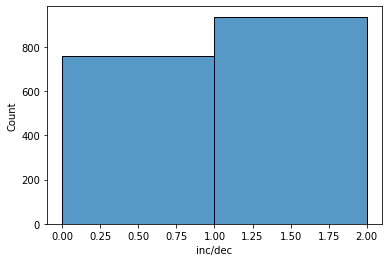

In [59]:
# check for balance data
# labels are balanced i.e equal split of inc and dec.
import seaborn as sns
sns.histplot(data=y, bins=2)

array([[<AxesSubplot:title={'center':'negative'}>,
        <AxesSubplot:title={'center':'positive'}>]], dtype=object)

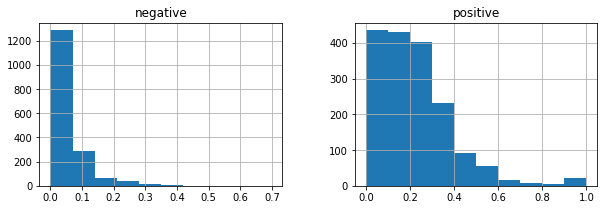

In [64]:
import matplotlib.pyplot as plt
X.hist(figsize=(10,3))

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (1272, 2)
X_test.shape: (425, 2)
y_train.shape: (1272,)
y_test.shape: (425,)


In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def classification_metric(y_test,y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    print("%.2f" % accuracy)
    # Confusion Matrix
    c_matrix= confusion_matrix(y_test,y_pred)
    print(c_matrix)
    return None

def model_evaluation(model,X_train,y_train,X_test,y_test):
    model = model.fit(X_train,y_train)
    # training accuracy
    classification_metric(y_train,model.predict(X_train))

    #testing accuracy
    classification_metric(y_test,model.predict(X_test))
    return None

# SVM Model (Linear Model)

In [67]:
## Linear Features
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

svm_clf = SVC(kernel="linear", C=100)
model_evaluation(svm_clf, X_train,y_train, X_test, y_test)

0.55
[[  0 570]
 [  0 702]]
0.55
[[  0 190]
 [  0 235]]


In [68]:
## Polynomial Features Degree 2
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("svm_clf", LinearSVC(C=1, loss="hinge", random_state=42))
    ])
model_evaluation(polynomial_svm_clf, X_train,y_train, X_test, y_test)

0.55
[[  0 570]
 [  0 702]]
0.55
[[  0 190]
 [  0 235]]


In [69]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("svm_clf", LinearSVC(C=1, loss="hinge", random_state=42))
    ])
model_evaluation(polynomial_svm_clf, X_train,y_train, X_test, y_test)

0.55
[[  0 570]
 [  0 702]]
0.55
[[  0 190]
 [  0 235]]


/Users/sarthakkaushik/Projects/uot/MachineLearning/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# SVM Model (Non_linear Model)

In [72]:
poly_kernel_svm_clf = Pipeline([
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=100))
    ])
model_evaluation(poly_kernel_svm_clf, X_train,y_train, X_test, y_test)


0.56
[[ 12 558]
 [  8 694]]
0.55
[[  2 188]
 [  2 233]]
